In [1]:
import glob
import unicodedata
import string, os
import torch

In [2]:
def findFiles(path): return glob.glob(path)

In [3]:
print(findFiles('/Users/srishtysuman/PycharmProjects/NaturalLanguageProcessing/rnn_char_level_classify_data/names/*.txt'))
print(len(findFiles('/Users/srishtysuman/PycharmProjects/NaturalLanguageProcessing/rnn_char_level_classify_data/names/*.txt')))

['/Users/srishtysuman/PycharmProjects/NaturalLanguageProcessing/rnn_char_level_classify_data/names/Czech.txt', '/Users/srishtysuman/PycharmProjects/NaturalLanguageProcessing/rnn_char_level_classify_data/names/German.txt', '/Users/srishtysuman/PycharmProjects/NaturalLanguageProcessing/rnn_char_level_classify_data/names/Arabic.txt', '/Users/srishtysuman/PycharmProjects/NaturalLanguageProcessing/rnn_char_level_classify_data/names/Japanese.txt', '/Users/srishtysuman/PycharmProjects/NaturalLanguageProcessing/rnn_char_level_classify_data/names/Chinese.txt', '/Users/srishtysuman/PycharmProjects/NaturalLanguageProcessing/rnn_char_level_classify_data/names/Vietnamese.txt', '/Users/srishtysuman/PycharmProjects/NaturalLanguageProcessing/rnn_char_level_classify_data/names/Russian.txt', '/Users/srishtysuman/PycharmProjects/NaturalLanguageProcessing/rnn_char_level_classify_data/names/French.txt', '/Users/srishtysuman/PycharmProjects/NaturalLanguageProcessing/rnn_char_level_classify_data/names/Irish.

In [4]:
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)
print(all_letters)
print(n_letters)

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'
57


In [5]:
[c for c in unicodedata.normalize('NFD', 'ncwijefhouewy9783yoiu32309e2_#_#()') if unicodedata.category(c) != 'Mn' and c in all_letters]

['n',
 'c',
 'w',
 'i',
 'j',
 'e',
 'f',
 'h',
 'o',
 'u',
 'e',
 'w',
 'y',
 'y',
 'o',
 'i',
 'u',
 'e']

In [6]:
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [7]:
print(unicodeToAscii('Ślusàrski'))

Slusarski


In [8]:
os.path.splitext(os.path.basename('/Users/srishtysuman/PycharmProjects/NaturalLanguageProcessing/rnn_char_level_classify_data/names/Czech.txt'))[0]


'Czech'

In [9]:
def read_files(filename):
    files=open(filename).read().strip().split('\n')
    file=[unicodeToAscii(line) for line in files]
    return file

category_lines = {}
all_categories = []
for filename in findFiles('/Users/srishtysuman/PycharmProjects/NaturalLanguageProcessing/rnn_char_level_classify_data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]    
    lines = read_files(filename)
    all_categories.append(category)
    category_lines[category] = lines

n_categories = len(all_categories)
print(category_lines)
print(all_categories)
print(len(category_lines))
print(len(all_categories))

{'Czech': ['Abl', 'Adsit', 'Ajdrna', 'Alt', 'Antonowitsch', 'Antonowitz', 'Bacon', 'Ballalatak', 'Ballaltick', 'Bartonova', 'Bastl', 'Baroch', 'Benesch', 'Betlach', 'Biganska', 'Bilek', 'Blahut', 'Blazek', 'Blazek', 'Blazejovsky', 'Blecha', 'Bleskan', 'Blober', 'Bock', 'Bohac', 'Bohunovsky', 'Bolcar', 'Borovka', 'Borovski', 'Borowski', 'Borovsky', 'Brabbery', 'Brezovjak', 'Brousil', 'Bruckner', 'Buchta', 'Cablikova', 'Camfrlova', 'Cap', 'Cerda', 'Cermak', 'Chermak', 'Cermak', 'Cernochova', 'Cernohous', 'Cerny', 'Cerney', 'Cerny', 'Cerv', 'Cervenka', 'Chalupka', 'Charlott', 'Chemlik', 'Chicken', 'Chilar', 'Chromy', 'Cihak', 'Clineburg', 'Klineberg', 'Cober', 'Colling', 'Cvacek', 'Czabal', 'Damell', 'Demall', 'Dehmel', 'Dana', 'Dejmal', 'Dempko', 'Demko', 'Dinko', 'Divoky', 'Dolejsi', 'Dolezal', 'Doljs', 'Dopita', 'Drassal', 'Driml', 'Duyava', 'Dvorak', 'Dziadik', 'Egr', 'Entler', 'Faltysek', 'Faltejsek', 'Fencl', 'Fenyo', 'Fillipova', 'Finfera', 'Finferovy', 'Finke', 'Fojtikova', 'Fremu

In [10]:
all_letters.find('p')

15

In [11]:
torch.zeros(5, 1, 26)[0][0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

In [12]:
def letterToTensor(letter):
    tensor=torch.zeros(1, n_letters)
    tensor[0][all_letters.find(letter)]=1
    return tensor

In [13]:
def letterToIndex(letter):
    return all_letters.find(letter)
def lineToTensor(line):
    tensor=torch.zeros(len(line), 1, n_letters)
    for i, letter in enumerate(line):
        tensor[i][0][letterToIndex(letter)]=1
    return tensor
print()
lineToTensor('srishty').size()

torch.Size([7, 1, 57])

In [14]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)


# testing on dummy input
input=letterToTensor('a')
print(input.size(), input)
hidden=torch.zeros(1, n_hidden)
print(hidden.size(), hidden)
output, hidden=rnn(input, hidden)
print(output)
print(hidden)


torch.Size([1, 57]) tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([1, 128]) tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[-2.8413, -2.9433, -2.8988, -2.9483, -2.8803, -3.0025, -2.8821, -2.8527,
         -2.9166, -2.9056, -2.8545, -2.9127,

In [15]:
rnn.parameters

<bound method Module.parameters of RNN(
  (i2h): Linear(in_features=185, out_features=128, bias=True)
  (h2o): Linear(in_features=128, out_features=18, bias=True)
  (softmax): LogSoftmax(dim=1)
)>

In [16]:
# running on dummy names
input=lineToTensor('srishty')
hidden=torch.zeros(1, n_hidden)
print(input.size(), input)
print(hidden.size(), hidden)
print(input[0])
rnn(input[0], hidden)

torch.Size([7, 1, 57]) tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        

(tensor([[-2.8795, -2.9721, -2.8992, -2.9135, -2.8882, -2.9625, -2.8906, -2.8261,
          -2.8799, -2.8733, -2.8590, -2.9109, -2.8579, -2.8263, -2.8754, -2.8643,
          -2.9469, -2.9153]], grad_fn=<LogSoftmaxBackward0>),
 tensor([[ 0.0350, -0.0049, -0.0535,  0.0654,  0.0109, -0.0304,  0.0012,  0.0919,
          -0.0003, -0.0242, -0.0240, -0.0089,  0.0276, -0.1126,  0.0514, -0.0398,
           0.0165, -0.0716,  0.0567,  0.0421, -0.0173,  0.0309,  0.0339,  0.0054,
           0.0146, -0.1073,  0.0271,  0.1000,  0.0226, -0.0254,  0.0024,  0.0544,
          -0.0025, -0.0660,  0.0619, -0.1066,  0.0371, -0.0702,  0.0190,  0.0947,
          -0.0126,  0.1323,  0.0326, -0.0124,  0.0248,  0.0117,  0.1161,  0.0372,
           0.1116, -0.0054,  0.0566, -0.0194,  0.0119, -0.0090, -0.0598,  0.0678,
           0.0056, -0.0713,  0.1409, -0.0428,  0.0216,  0.0966, -0.0348, -0.0234,
          -0.0816,  0.0040,  0.0711,  0.0269,  0.1096, -0.0599,  0.0285,  0.0652,
          -0.0085,  0.0849, -0.1149,

In [17]:
def categoryFromOutput(output):
    print(output[0])
    top_n, top_i = output.topk(1)
    print(top_n, top_i)
    category_i = top_i[0].item()
    print(category_i)
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

tensor([-2.8413, -2.9433, -2.8988, -2.9483, -2.8803, -3.0025, -2.8821, -2.8527,
        -2.9166, -2.9056, -2.8545, -2.9127, -2.8602, -2.8555, -2.8600, -2.8285,
        -2.9793, -2.8264], grad_fn=<SelectBackward0>)
tensor([[-2.8264]], grad_fn=<TopkBackward0>) tensor([[17]])
17
('Polish', 17)


In [18]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    # 1. get one category randomly
    category = randomChoice(all_categories)
    # 2. corresponding to that randon category, get a line randomly
    line = randomChoice(category_lines[category])
    # 3. corresponding to the random category, get a random tensor correspoding to its index
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    # 4. corresponding to the line, get its tensor from lineToTensor
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category)
    print('line =', line)
    print('category_tensor', category_tensor)
    print('line_tensor', line_tensor)
    print(line_tensor.size())

category = English
line = Southgate
category_tensor tensor([9])
line_tensor tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 1., 0., 0., 0.,

In [19]:
torch.tensor([all_categories.index('French')], dtype=torch.long)

tensor([7])

In [20]:
criterion = nn.NLLLoss()
learning_rate = 0.005

In [21]:
'''
    Each loop of training will:
        1. Create input and target tensors
        2. Create a zeroed initial hidden state
        3. Read each letter in and
            Keep hidden state for next letter
        4. Compare final output to target
        5. Back-propagate
        6. Return the output and loss
'''

'\n    Each loop of training will:\n        1. Create input and target tensors\n        2. Create a zeroed initial hidden state\n        3. Read each letter in and\n            Keep hidden state for next letter\n        4. Compare final output to target\n        5. Back-propagate\n        6. Return the output and loss\n'

In [22]:
line_tensor.size()[0]

9

In [23]:
def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()
    rnn.zero_grad()
    # loop through all the letters
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
    # print(output, category_tensor)
    loss = criterion(output, category_tensor)
    loss.backward()
    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)
    return output, loss.item()

In [24]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print ``iter`` number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

tensor([-2.9855, -3.0309, -2.6146, -2.7366, -4.7099, -4.6208, -2.6915, -3.3509,
        -2.2992, -2.9255, -3.0122, -2.8753, -2.3236, -3.2769, -2.3030, -2.6819,
        -4.6734, -2.6799], grad_fn=<SelectBackward0>)
tensor([[-2.2992]], grad_fn=<TopkBackward0>) tensor([[8]])
8
5000 5% (0m 5s) 2.2992 William / Irish ✓
tensor([-4.4042, -4.0861, -3.5676, -5.5797, -1.2203, -1.6382, -3.0983, -4.4984,
        -4.1052, -3.8428, -4.6990, -3.8177, -5.8369, -5.0205, -3.5560, -4.5171,
        -1.3399, -4.3134], grad_fn=<SelectBackward0>)
tensor([[-1.2203]], grad_fn=<TopkBackward0>) tensor([[4]])
4
10000 10% (0m 10s) 1.3399 Noh / Chinese ✗ (Korean)
tensor([-5.0939, -3.3855, -5.2089, -5.1855, -1.2299, -1.4230, -5.7392, -5.0683,
        -3.5449, -3.7136, -5.2752, -7.9991, -4.6833, -6.5569, -3.8417, -4.7016,
        -1.1973, -5.4673], grad_fn=<SelectBackward0>)
tensor([[-1.1973]], grad_fn=<TopkBackward0>) tensor([[16]])
16
15000 15% (0m 15s) 1.1973 Wang / Korean ✓
tensor([-5.1637, -4.0790, -4.7166, -6.2

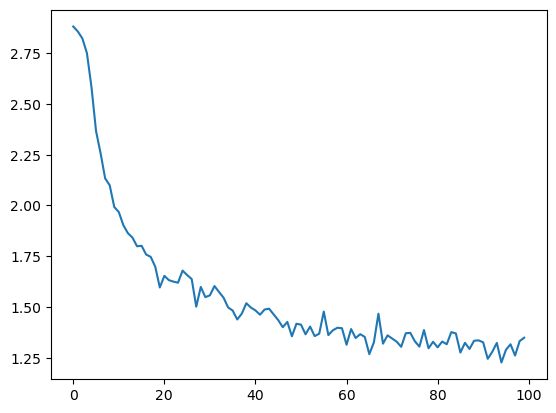

In [25]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

tensor([-5.7529, -4.6604, -2.8277, -0.1059, -6.7955, -8.0776, -7.0015, -4.4884,
        -6.8403, -6.2349, -7.4532, -6.1955, -6.8836, -6.2459, -6.1476, -6.0823,
        -8.7185, -6.2431], grad_fn=<SelectBackward0>)
tensor([[-0.1059]], grad_fn=<TopkBackward0>) tensor([[3]])
3
tensor([ -6.2919,  -5.4802, -13.4196, -11.2897, -17.3493, -14.7271,  -7.5828,
         -1.4301,  -7.2834,  -4.3151,  -1.7105,  -2.8616,  -1.6312,  -1.3828,
         -8.1668,  -2.8968, -18.1187,  -9.0816], grad_fn=<SelectBackward0>)
tensor([[-1.3828]], grad_fn=<TopkBackward0>) tensor([[13]])
13
tensor([ -3.6987,  -3.2710,  -5.0398,  -7.0094, -11.2731, -11.6333,  -4.9241,
         -1.1765,  -1.7240,  -1.7083,  -4.1957,  -6.3370,  -5.6408,  -7.0080,
         -1.8282,  -2.6855, -10.9120,  -5.4003], grad_fn=<SelectBackward0>)
tensor([[-1.1765]], grad_fn=<TopkBackward0>) tensor([[7]])
7
tensor([ -3.2332,  -6.6498,  -8.4586,  -3.7576, -11.1192, -16.0963,  -6.1224,
        -13.6212, -15.2320,  -7.8304, -11.8821,  -7.4724,  

/var/folders/g9/56rlvw7s6w54xn7rhdmb0qlw0000gn/T/ipykernel_35529/3585656379.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + all_categories, rotation=90)
/var/folders/g9/56rlvw7s6w54xn7rhdmb0qlw0000gn/T/ipykernel_35529/3585656379.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + all_categories)


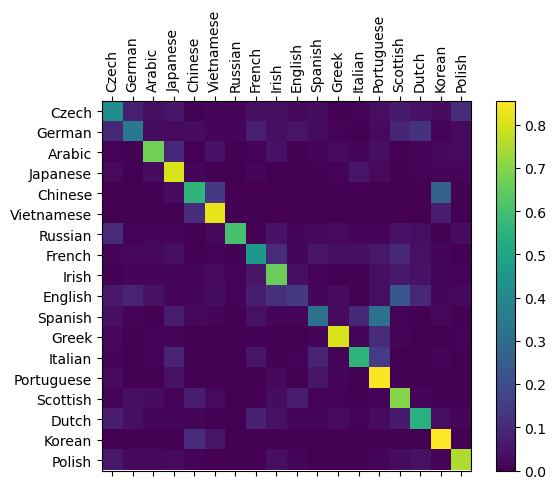

In [26]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [27]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-0.23) Czech
(-1.93) Russian
(-3.47) English

> Jackson
(-0.19) Scottish
(-2.19) English
(-4.15) Czech

> Satoshi
(-0.75) Japanese
(-1.27) Italian
(-1.98) Arabic
